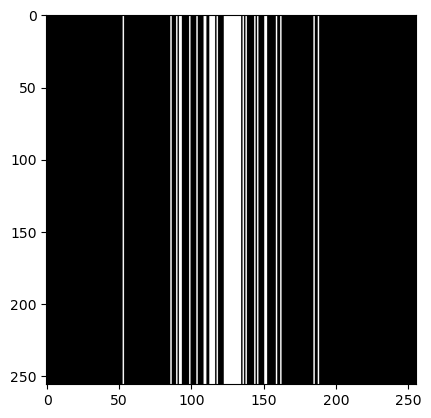

In [1]:
# Generating masks with the functions provided by Score-MRI[1], which also referred to FastMRI's code base.
from utils import get_mask
from matplotlib import pyplot as plt
import torch
img = torch.zeros((1,1,256,256))
mask = get_mask(img, 256, 1,
                type="gaussian1d", # ["uniform1d", "gaussian1d", "gaussian2d", "poisson"]
                acc_factor=8)      # [4,8,15]
plt.imshow(torch.abs(mask[0,0]).cpu().numpy(),cmap='gray')
pass

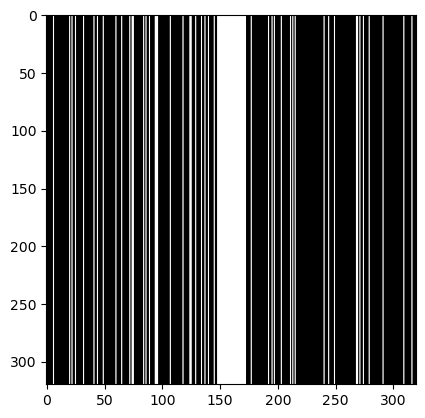

In [2]:
# Visualize one from /generated_masks.
mask = torch.load("generated_masks/mask_4x_uniform1d.pth")
plt.imshow(torch.abs(mask[0,0]).cpu().numpy(),cmap='gray')
pass

In [3]:
# Generate the layout pdf.
import os
import torch
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt

directory = 'generated_masks'
files = sorted([os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.pth')])

with PdfPages('all_vis.pdf') as pdf:
    for file in files:
        mask = torch.load(file)
        
        plt.figure(figsize=(8, 8))
        plt.imshow(torch.abs(mask[0,0]).cpu().numpy(), cmap='gray')
        plt.axis('off')  
        plt.title(os.path.basename(file))
        
        pdf.savefig()
        plt.close()